<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Supervised-classification" data-toc-modified-id="Supervised-classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Supervised classification</a></span></li></ul></div>

# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [40]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
import time                                                 # para tiempo
inicio=time.time()                                          # momento inicial

In [3]:
# Your code here
df=pd.read_csv('data_all.zip', nrows=75000)

In [4]:
df.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.shape

(75000, 785)

In [5]:
data=df.values 
print ('Dimensiones matriz de datos: {}'.format(data.shape))

Dimensiones matriz de datos: (75000, 785)


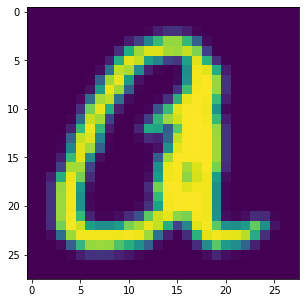

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(data[0,1:].reshape(28,28))  
plt.show()

In [7]:
alfabeto={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
          10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J',
          20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
          30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z',
          36:'a', 37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
          46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s', 55:'t',
          56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [11]:
Y=np.zeros((data.shape[0],10))   
print ('Dimension de Y: {}'.format(Y.shape))  
print ('')
for i in range(10):
    Y[:,i]=np.where(data[:,0]==i,1,0)
print(Y[0:10,:]) # 10 primeras filas

Dimension de Y: (75000, 10)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [27]:
# Your code here
etiquetas=data[:,0]        # etiqueta, el numero en si, 42000 etiquetas
X=data[:,1:]               # datos numericos de los pixeles, cada columna es un pixel (variables indep)
print ('Dimension original de X: {}'.format(X.shape)) 
print ('')

X=X[:,X.sum(axis=0)!=0]            # se quitan las columnas=0 (la suma de los elementos es no nulo, no hay informacion)
print ('Dimension limpia de X: {}'.format(X.shape)) 

Dimension original de X: (75000, 784)

Dimension limpia de X: (75000, 739)


In [28]:
X_train, Y_train=X[0:70000,:], Y[0:70000,:]        # datos de entranamiento
X_train_sk=X_train.copy()                          # para sklearn

X_test, Y_test=X[70000:,:], Y[70000:,:]            # datos de test
X_test_sk=X_test.copy()                            # para sklearn

print ('Dimensiones train: X={}, Y={}'.format(X_train.shape, Y_train.shape))  
print ('')
print ('Dimensiones test: X={}, Y={}'.format(X_test.shape, Y_test.shape))

Dimensiones train: X=(70000, 739), Y=(70000, 10)

Dimensiones test: X=(5000, 739), Y=(5000, 10)


In [29]:
etiquetas_train=etiquetas[0:70000]       # etiquetas para entranamiento
etiquetas_test=etiquetas[70000:]         # etiquetas para test

print ('Dimensiones etiquetas train: {}'.format(etiquetas_train.shape))
print ('')
print ('Dimensiones etiquetas test: {}'.format(etiquetas_test.shape))

Dimensiones etiquetas train: (70000,)

Dimensiones etiquetas test: (5000,)


In [20]:
def normalizador(X):                # normalizador de X
    X_media=X.mean(axis=0)          # media de X
    X_std=X.std(axis=0)             # desviacion estandar de X
    X_std[X_std==0]=1.0             # si hay alguna std=0 ponla a 1
    X=(X-X_media)/X_std             # normaliza
    
    X=np.insert(X, 0, 1, axis=1)    # esta linea añade una columna de 1, feature engineering [1, f1, f2.., fn, f1f2...] (mejora un 10%)
    
    return X

In [30]:
X_train=normalizador(X_train)
X_test=normalizador(X_test)
print ('Datos normalizados.')

Datos normalizados.


In [31]:
val_inicial=np.random.rand(X_train.shape[1]) # valores iniciales de los parametros alfa

A_opt=np.zeros((X_train.shape[1],10))        # se crea la matriz para los parametros optimizados, alfas

In [32]:
lambda_reg=100.            # valor obtenido desde gridsearching

In [41]:
ini_opt_sk=time.time()

L=LogisticRegression(C=0.01, 
                          penalty='l2', 
                          tol=0.0001, 
                          max_iter=70,
                          solver='lbfgs', 
                          multi_class='multinomial')
L.fit(X_train_sk, etiquetas_train)
t_sklearn=time.time()-ini_opt_sk
print ('\nTiempo total optimizacion sklearn: {:.2f} segundos.\n' .format(t_sklearn))


Tiempo total optimizacion sklearn: 79.83 segundos.



/home/jesus_chao/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
def resumen_sk(datos):
    for e in datos:
        nombre, etiqueta, Xs=e
        etiq=etiqueta.size
        
        y_pred_sk=L.predict(Xs)
        
        cuenta=0
        for muestra in range(etiq):
            if y_pred_sk[muestra]==etiqueta[muestra]:         
                cuenta+=1
        
        print ("\n{}".format(nombre))
        print ("{} correctos de {} ==> {:.4}% correcto".format(cuenta, etiq, cuenta/etiq*100))

In [45]:
resumen_sk([('Entranamiento  :', etiquetas_train, X_train_sk)])
resumen_sk([('Test  :', etiquetas_test, X_test_sk)])


Entranamiento  :
51123 correctos de 70000 ==> 73.03% correcto

Test  :
3550 correctos de 5000 ==> 71.0% correcto


* Try to do the same thing with lowercases.

In [ ]:
# Your code here


* Try to do the same thing with numbers.

In [ ]:
# Your code here
